In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

# Importing the datasets 

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.drop('User ID',axis = 1)

# visualization of data 

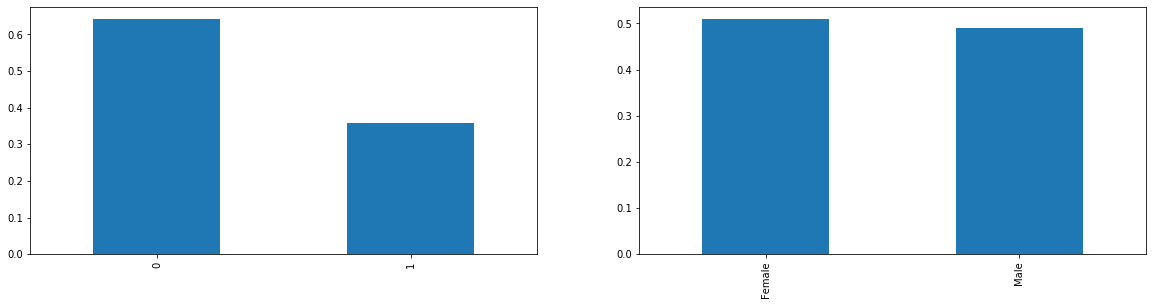

In [4]:
plt.figure(1)
plt.subplot(221)
df['Purchased'].value_counts(normalize = True).plot.bar(figsize = (20,10))
plt.subplot(222)
df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10))
plt.show()

In [5]:
df = pd.get_dummies(df)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [6]:
df.corr()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
Age,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


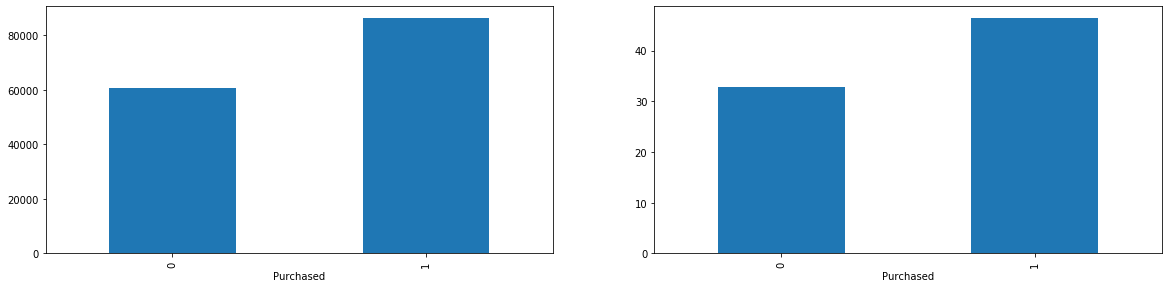

In [7]:
plt.figure(1)
plt.subplot(221)
df.groupby('Purchased')['EstimatedSalary'].mean().plot.bar(figsize = (20,10))
plt.subplot(222)
df.groupby('Purchased')['Age'].mean().plot.bar(figsize = (20,10))
plt.show()

In [8]:
feature = df.drop('Purchased',axis = 1)
label = df['Purchased']

In [9]:
feature.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1



# Splitting the dataset into the Training set and Test set

In [10]:
x_train,x_test, y_train,y_test = train_test_split(feature,label, test_size = 0.2, random_state = 2)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 4) (80, 4) (320,) (80,)


# Feature Scaling

In [12]:
sc_x= StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Fitting the classifier into the Training set

In [13]:
svc_model = SVC()
svc_model.fit(x_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Predicting the test set results

In [14]:
y_pred = svc_model.predict(x_test)

In [15]:
score = accuracy_score(y_test, y_pred)
score

0.9125

# Making the Confusion Matrix and plotting

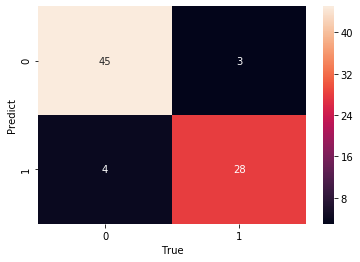

In [16]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()
